# Webscraping a Newspaper and Data Cleaning Using Python

Reading newspaper headlines, especially stories from my home country of ESwatini or Swaziland is something I do on a daily basis. It helps me keep in touch with what is going in the country and this comes in handy especially for me since I live in the USA. In this article, we will scrape newspaper headlines using a few lines of Python code. We will also perform data cleaning and formatting the data into a dataframe which is easier to read.

This article was written on 3/13/2020

We start by importing the necessary libraries. We will use the libraries of BeautifulSoup and requests

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

We start by making a webpage request to extract its entire contents

In [2]:
url = 'http://times.co.sz'
response = requests.get(url)

We then use the BeautifulSoup library to parse the html. We store this in a variable we name 'soup'. You can name it anything you like.

Python's 'html.parser' parses the html data the same way a web browser does.

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')

Next we go to the webpage, and right click on a story's summary and click 'Inspect'. This brings up the html of the page.
In the example below, we see that the interesting story is contained in the 'span' tag and 'summary' class

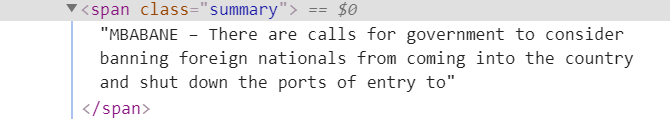

We use the find_all function to hone in on the tag and class of interest to help us grab the information we want.
This returns a BeautifulSoup element which is a subclass of a list and printing the first 2 summary stories shows the stories together with the html elements

In [4]:
news_summary = soup.find_all('span', class_='summary')
print(type(news_summary))
print(news_summary[:2])

<class 'bs4.element.ResultSet'>
[<span class="summary">MBABANE – There are calls for government to consider banning foreign nationals from coming into the country and shut down the ports of entry to</span>, <span class="summary">MBABANE – Don’t touch pension benefits except where that judgment is in respect of maintenance!
The Supreme Court has declared that pension benefits of public officers</span>]


We use .text method? to extract the text without the html and append that to a list. As shown below, the first 2 news summaries are now printed out without the html, which is very nice

In [5]:
news = []

for content in news_summary:
    news.append(content.text)
    
print(news[:2])

['MBABANE – There are calls for government to consider banning foreign nationals from coming into the country and shut down the ports of entry to', 'MBABANE – Don’t touch pension benefits except where that judgment is in respect of maintenance!\r\nThe Supreme Court has declared that pension benefits of public officers']


In addition, we want to print out the full article hyperlinks so that we can copy and paste them into a web browser to read the full contents of a story we find interesting.

Again, we go to the webpage and right click on the 'Full Story' hyperlink to view the html.
We see that the full story is contained in a 'div' tag and 'article_link' class.

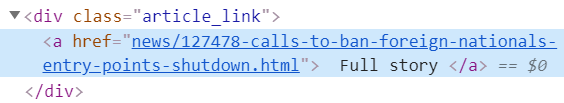

In [6]:
article_link = soup.find_all('div', class_='article_link')
print(article_link[:2])

[<div class="article_link">
<a href="news/127478-calls-to-ban-foreign-nationals-entry-points-shutdown.html">  Full story </a>
</div>, <div class="article_link">
<a href="news/127477-appeal-to-withhold-head-teacher%E2%80%99s-pension-dismissed.html">  Full story </a>
</div>]


We loop through the hyperlinks and use a['href'] to extract just the url for the full story

In [7]:
links = []
for hyperlink in article_link:
    links.append(hyperlink.a['href'])

print(links[:2])

['news/127478-calls-to-ban-foreign-nationals-entry-points-shutdown.html', 'news/127477-appeal-to-withhold-head-teacher%E2%80%99s-pension-dismissed.html']


As you can see if you copy and paste the urls above, they won't work. Clicking on the full story indicates that the urls are missing the following portion "http://www.times.co.sz/"

We need to append that portion for them to work. We loop throught the links and append the missing string and voila, we now have the full working urls for the full stories

In [8]:
links_2 = []
url_add = 'http://www.times.co.sz/'

for e in links:
    links_2.append(url_add + e)

print(links_2[:2])

['http://www.times.co.sz/news/127478-calls-to-ban-foreign-nationals-entry-points-shutdown.html', 'http://www.times.co.sz/news/127477-appeal-to-withhold-head-teacher%E2%80%99s-pension-dismissed.html']


Lastly we combine the 2 lists in a dataframe to make it easier to read. We call this new dataframe 'news_dataframe'

In [9]:
news_dataframe = pd.DataFrame(
    {'NEWS SUMMARY': news,
     'URL': links_2
    })

We print out the dataframe and see the summary news together with the urls which can be copied and pasted on a web browser to explore full stories of interest

In [10]:
print(type(news_dataframe))

<class 'pandas.core.frame.DataFrame'>


In [11]:
news_dataframe.head()

,NEWS SUMMARY,URL
0,MBABANE – There are calls for government to co...,http://www.times.co.sz/news/127478-calls-to-ba...
1,MBABANE – Don’t touch pension benefits except ...,http://www.times.co.sz/news/127477-appeal-to-w...
2,LOBAMBA – There is a need to check believers w...,http://www.times.co.sz/news/127476-easters-%E2...
3,\n\t\t\t\tMBABANE – There are calls for govern...,http://www.times.co.sz/news/127478-calls-to-ba...
4,\n\t\t\t\tTHE fragile economy of Eswatini and ...,http://www.times.co.sz/just-thinking/127463-pu...


As seen above, we cannot see the full stories and urls. We will use .values method to print out the full contents

In [12]:
print(news_dataframe.values)

[['MBABANE – There are calls for government to consider banning foreign nationals from coming into the country and shut down the ports of entry to'
  'http://www.times.co.sz/news/127478-calls-to-ban-foreign-nationals-entry-points-shutdown.html']
 ['MBABANE – Don’t touch pension benefits except where that judgment is in respect of maintenance!\r\nThe Supreme Court has declared that pension benefits of public officers'
  'http://www.times.co.sz/news/127477-appeal-to-withhold-head-teacher%E2%80%99s-pension-dismissed.html']
 ['LOBAMBA – There is a need to check believers who will attend Easter services at Somhlolo for the coronavirus. This was a submission made by'
  'http://www.times.co.sz/news/127476-easters-%E2%80%98test-christians-at-somhlolo%E2%80%99.html']
 ['\n\t\t\t\tMBABANE – There are calls for government to consider banning foreign nationals from coming into the country and shut down the ports of entry to\n\t\t\t'
  'http://www.times.co.sz/news/127478-calls-to-ban-foreign-nation

# CONCLUSION

It would be great if the urls can be made clickable. That would save time and avoid copy and paste. Please leave your comments or share your code if you know how this can be accomplished.

Enjoy!